# XRADIO Demo

XRADIO is an open-source Python package that leverages [xarray](https://github.com/pydata/xarray) to provide an interface for radio astronomy data. It includes converters from legacy formats and contains versioned schemas for each dataset type. A schema checker is also included to verify if a dataset conforms to the schema.

Data is organized into:

- [xarray Datasets](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html): A multi-dimensional, in-memory, array database of labeled n-dimensional arrays.
- `XRADIO Processing Sets`: XRADIO-specific data structure, based on a Python dictionary, that consists of a collection of `xarray Datasets`. We will be looking into replacing the processing set with [xarray Datatree](https://xarray-datatree.readthedocs.io/en/latest/) in the future.

## Import xradio

In [1]:
import os, pprint
from importlib.metadata import version

try:
    os.system("pip install --upgrade xradio")

    import xradio

    print("Using xradio version", version("xradio"))

except ImportError as exc:
    print(f"Could not import xradio: {exc}")

Using xradio version 0.0.43


## Download example MSv2

### Available Datasets

In [1]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                     ┃ dtype          ┃ telescope   ┃ size     ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms     │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms      │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3      │ CASA MS v2     │ ALMA        │ 0.055    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ extract_holog_verification.json          │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ holog_numerical_verification.json        │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ locit-input-pha.cal                      │ CASA Cal Table │ VLA         │ 0.000468 │ antenna location cal table │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_cutoff_mask                        │ npy            │ na          │ 0.000348 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ heuristic_model                          │ bin            │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_test_files                         │ na             │ na          │          │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                     │ CASA MS v2     │ SKA Mid     │ 0.029    │ Simulated Interferometer   │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                     │ zarr           │ ALMA        │ 0.014    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms               │ CASA MS v2     │ ALMA        │ 0.202    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.py39.vis.zarr    │ zarr           │ ALMA        │ 0.207    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms         │ CASA MS v2     │ ALMA        │ 0.0056   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.py39.vis.… │ zarr           │ ALMA        │ 0.0047   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ complex_valued_uv.im                     │ image          │ Simulated   │ 0.768    │ Simulated                  │
├──────────────────────────────────────────┼────────────

In [1]:
from toolviper.utils.data import download
download(file="gmrt.ms")

[2025-01-17 16:16:46,635]  WARNING    viperlog:  File exists: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2025-01-17 16:16:46,635]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List  
 ─────────────── 
  gmrt.ms

gmrt.ms.zip:   0%|          | 0.00/2.03M [00:00<?, ?iB/s]

In [3]:
from toolviper.utils.data import download
download(file="ALMA_uid___A002_X1003af4_X75a3.split.avg.ms") #ALMA Mosaic Ephmeris of the Sun.

[2024-11-12 15:06:14,736]  WARNING   toolviper:  File exists: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-11-12 15:06:14,737]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List                                
 ───────────────────────────────────────────── 
  ALMA_uid___A002_X1003af4_X75a3.split.avg.ms

[2024-11-12 15:06:16,474]     INFO   toolviper:  File exists: ALMA_uid___A002_X1003af4_X75a3.split.avg.ms 


## Setup Dask Client

In [4]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2024-11-12 15:06:16,494]     INFO   toolviper:  Module path: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper 
[2024-11-12 15:06:16,497]  WARNING      client:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-11-12 15:06:17,331]     INFO      client:  Client <MenrvaClient: 'tcp://127.0.0.1:54778' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54778,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:54790,Total threads: 1
Dashboard: http://127.0.0.1:54795/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:54781,


## Processing Set

A Processing Set is an extended Python dictionary that consists of MSv4s that contains a single observation, spectral window, polarization setup, observation mode, processor and beam per antenna.

### Convert MSv2 => Processing Set (PS)

In [31]:
from xradio.measurement_set import convert_msv2_to_processing_set

msv2_name = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ms"
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.vis.zarr"

convert_msv2_to_processing_set(
    in_file=msv2_name,
    out_file=convert_out,
    overwrite=True,
    parallel=True,
)

[2024-11-12 15:32:39,229]     INFO      client:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-11-12 15:32:39,780]     INFO      client:  Number of partitions: 96 
[2024-11-12 15:32:39,780]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [0], FIELD [0], SCAN [7] 
[2024-11-12 15:32:39,781]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [16], FIELD [0], SCAN [7] 
[2024-11-12 15:32:39,781]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [17], FIELD [0], SCAN [7] 
[2024-11-12 15:32:39,782]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [19], FIELD [2], SCAN [6] 
[2024-11-12 15:32:39,782]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [20 99], FIELD [0], SCAN [8] 
[2024-11-12 15:32:39,783]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [21 48 75], FIELD [3], SCAN [8] 
[2024-11-12 15:32:39,783]     INFO      client:  OBSERVATION_ID [0], DDI [0], STATE [22 49 76], FIELD [4],

### Lazy open PS

In [6]:
from xradio.measurement_set import open_processing_set
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.vis.zarr"

ps = open_processing_set(convert_out)

In [7]:
len(ps)

96

## PS Methods: Summary

Generate and retrieve a summary of the Processing Set.

The summary includes information such as the names of the Measurement Sets, their intents, polarizations, spectral window names, field names, source names, field coordinates, start frequencies, and end frequencies.

In [8]:
import pandas as pd
pd.set_option('display.max_rows', None)
ps.summary() #returns a pandas dictionary.

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
18,ALMA_uid___A002_X1003af4_X75a3.split.avg_00,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WV...","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
8,ALMA_uid___A002_X1003af4_X75a3.split.avg_01,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#A...","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
49,ALMA_uid___A002_X1003af4_X75a3.split.avg_02,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
58,ALMA_uid___A002_X1003af4_X75a3.split.avg_03,"[CALIBRATE_PHASE#ON_SOURCE, CALIBRATE_WVR#ON_S...","(31, 51, 1, 2)","[XX, YY]",[6],X767114449#ALMA_RB_06#BB_4#SQLD_0,[J1408-0752_2],[J1408-0752_2],[],"[icrs, 14h08m56.48s, -7d52m26.67s]",2.480000e+11,2.480000e+11
59,ALMA_uid___A002_X1003af4_X75a3.split.avg_04,[OBSERVE_TARGET#OFF_SOURCE],"(14, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
48,ALMA_uid___A002_X1003af4_X75a3.split.avg_05,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_3],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
10,ALMA_uid___A002_X1003af4_X75a3.split.avg_06,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_4],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
17,ALMA_uid___A002_X1003af4_X75a3.split.avg_07,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_5],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
6,ALMA_uid___A002_X1003af4_X75a3.split.avg_08,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_6],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
19,ALMA_uid___A002_X1003af4_X75a3.split.avg_09,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_7],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11


## PS Methods: Sub-selecting from PS
Select a subset of the Processing Set based on specified criteria.

This method allows filtering the Processing Set by matching column names and values or by applying a Pandas query string. The selection criteria can target various attributes of the Measurement Sets such as intents, polarization, spectral window names, etc.

In [9]:
sub_ps = ps.sel(intents="OBSERVE_TARGET#ON_SOURCE",spw_name="FULL_RES",string_exact_match=False)
sub_ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
12,ALMA_uid___A002_X1003af4_X75a3.split.avg_69,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_3],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
11,ALMA_uid___A002_X1003af4_X75a3.split.avg_70,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_4],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
2,ALMA_uid___A002_X1003af4_X75a3.split.avg_71,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_5],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
19,ALMA_uid___A002_X1003af4_X75a3.split.avg_72,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_6],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
24,ALMA_uid___A002_X1003af4_X75a3.split.avg_73,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_7],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
25,ALMA_uid___A002_X1003af4_X75a3.split.avg_74,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_8],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
18,ALMA_uid___A002_X1003af4_X75a3.split.avg_75,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_9],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
5,ALMA_uid___A002_X1003af4_X75a3.split.avg_76,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_10],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
8,ALMA_uid___A002_X1003af4_X75a3.split.avg_77,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_11],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
6,ALMA_uid___A002_X1003af4_X75a3.split.avg_78,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_12],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11


In [10]:
sub_ps = ps.sel(field_name=["Sun_10_3","Sun_10_4"])
sub_ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
4,ALMA_uid___A002_X1003af4_X75a3.split.avg_05,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_3],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
1,ALMA_uid___A002_X1003af4_X75a3.split.avg_06,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_4],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
0,ALMA_uid___A002_X1003af4_X75a3.split.avg_37,[OBSERVE_TARGET#ON_SOURCE],"(9, 51, 4, 1)",[XX],[8],WVR#NOMINAL_1,[Sun_10_3],[Sun_10_0],[],Ephemeris,1.845500e+11,1.905500e+11
2,ALMA_uid___A002_X1003af4_X75a3.split.avg_38,[OBSERVE_TARGET#ON_SOURCE],"(9, 51, 4, 1)",[XX],[8],WVR#NOMINAL_1,[Sun_10_4],[Sun_10_0],[],Ephemeris,1.845500e+11,1.905500e+11
5,ALMA_uid___A002_X1003af4_X75a3.split.avg_69,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_3],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
3,ALMA_uid___A002_X1003af4_X75a3.split.avg_70,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_4],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11


## PS Methods: Phase Center

In [11]:
ps['ALMA_uid___A002_X1003af4_X75a3.split.avg_70'].VISIBILITY.attrs['field_and_source_xds'] #Each VISIBILITY data variable has a field_and_source_xds attribute.

<xarray.Dataset> Size: 636B
Dimensions:                       (time_ephemeris: 2, sky_pos_label: 3,
                                   line_label: 1, ellipsoid_pos_label: 3,
                                   sky_dir_label: 2)
Coordinates:
  * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
    field_name                    <U8 32B ...
  * line_label                    (line_label) <U21 84B '0'
    line_name                     (line_label) <U22 88B dask.array<chunksize=(1,), meta=np.ndarray>
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
    source_name                   <U8 32B ...
  * time_ephemeris                (time_ephemeris) float64 16B 1.667e+09 1.66...
Data variables:
    FIELD_PHASE_CENTER            (time_ephemeris, sky_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    HELIOCENTRIC_RADIAL_VELOCITY  (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    LINE_REST_FREQUENCY           (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LINE_SYSTEMIC_VELOCITY        (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    NORTH_POLE_ANGULAR_DISTANCE   (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    NORTH_POLE_POSITION_ANGLE     (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    OBSERVER_PHASE_ANGLE          (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    OBSERVER_POSITION             (ellipsoid_pos_label) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
    SOURCE_LOCATION               (time_ephemeris, sky_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    SOURCE_RADIAL_VELOCITY        (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    SUB_OBSERVER_DIRECTION        (time_ephemeris, ellipsoid_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
Attributes:
    is_ephemeris:  True
    type:          field_and_source

In [12]:
field_and_source_xds, ephemris_field_and_source_xds = ps.get_combined_field_and_source_xds()
ephemris_field_and_source_xds

<xarray.Dataset> Size: 6kB
Dimensions:                       (field_name: 28, sky_pos_label: 3,
                                   ellipsoid_pos_label: 3, sky_dir_label: 2)
Coordinates:
  * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
  * field_name                    (field_name) <U9 1kB 'Sun_10_18' ... 'Sun_1...
    source_name                   (field_name) <U8 896B 'Sun_10_0' ... 'Sun_1...
Data variables:
    FIELD_PHASE_CENTER            (field_name, sky_pos_label) float64 672B dask.array<chunksize=(2, 3), meta=np.ndarray>
    HELIOCENTRIC_RADIAL_VELOCITY  (field_name) float64 224B dask.array<chunksize=(2,), meta=np.ndarray>
    NORTH_POLE_ANGULAR_DISTANCE   (field_name) float64 224B dask.array<chunksize=(2,), meta=np.ndarray>
    NORTH_POLE_POSITION_ANGLE     (field_name) float64 224B dask.array<chunksize=(2,), meta=np.ndarray>
    OBSERVER_PHASE_ANGLE          (field_name) float64 224B dask.array<chunksize=(2,), meta=np.ndarray>
    OBSERVER_POSITION             (field_name, ellipsoid_pos_label) float64 672B dask.array<chunksize=(2, 3), meta=np.ndarray>
    SOURCE_LOCATION               (field_name, sky_pos_label) float64 672B dask.array<chunksize=(2, 3), meta=np.ndarray>
    SOURCE_RADIAL_VELOCITY        (field_name) float64 224B dask.array<chunksize=(2,), meta=np.ndarray>
    SUB_OBSERVER_DIRECTION        (field_name, ellipsoid_pos_label) float64 672B dask.array<chunksize=(2, 3), meta=np.ndarray>
    FIELD_OFFSET                  (field_name, sky_dir_label) float64 448B 0....
Attributes:
    is_ephemeris:       True
    type:               field_and_source
    center_field_name:  Sun_10_0

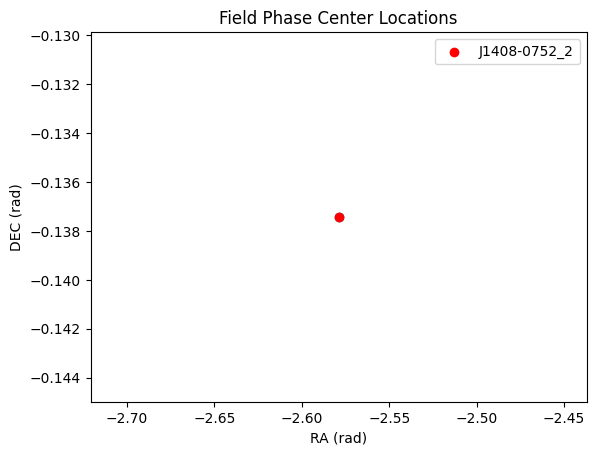

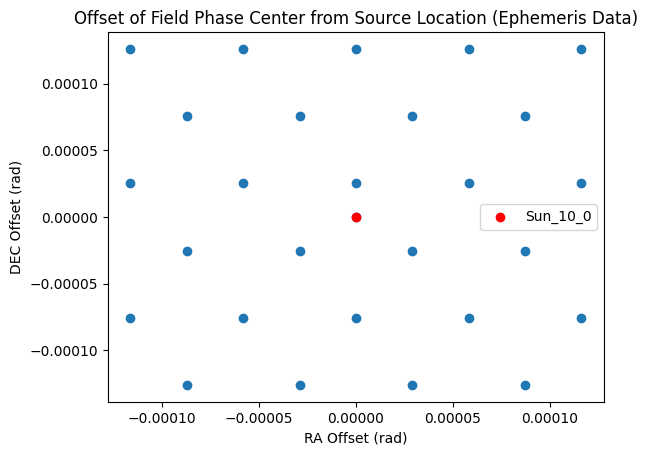

In [13]:
ps.plot_phase_centers()

## PS Methods: Antenna

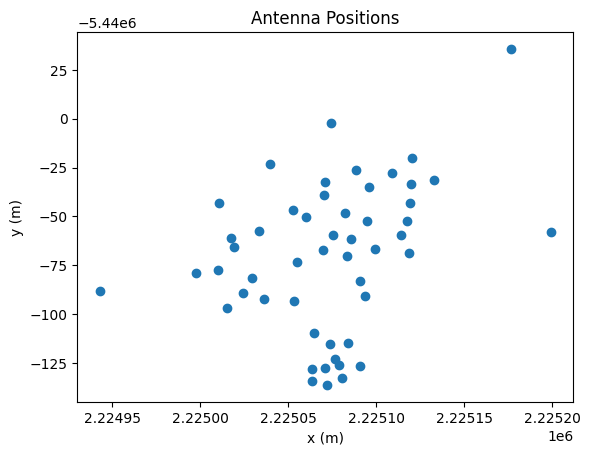

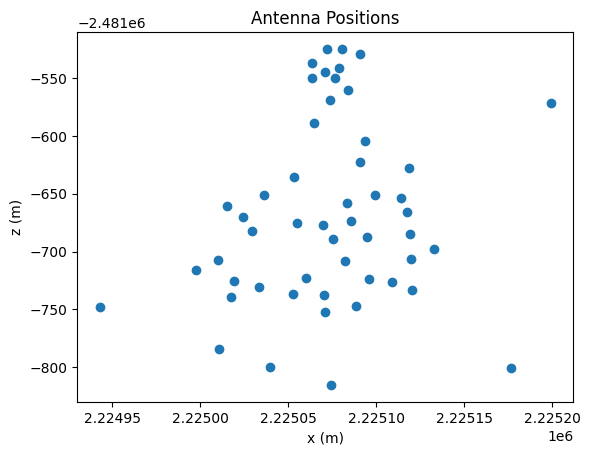

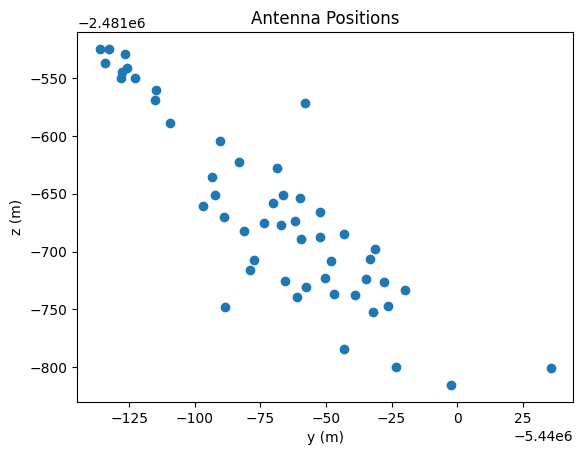

In [14]:
ps.plot_antenna_positions()

## MSv4 vs MSv2

- An MS v4 is fully self-describing and contains the information for a single observation, spectral window, polarization setup, observation mode, processor, and beam per antenna.
- Data is stored in Datasets of labeled n-dimensional arrays (called data variables) instead of tables.
- The table concept of rows has been replaced by relevant dimensions. For example, the VISIBILITY column in the MAIN table of MS v2 is now an n-dimensional array with dimensions time x baseline x frequency x polarization (row has been split into time x baseline).

## MSv4

<div style="text-align: center;">
    <figure id="figure-1" style="display: inline-block;">
        <img src="https://docs.google.com/drawings/d/e/2PACX-1vQVgjF5xNeIv8gpi2G3R8JXw2bNkVIUXdizIZluCGdnHc4z79ryW2fNUycJAd_CQh9sXLwdlx1oiAAX/pub?w=690&amp;h=510"
             alt="Processing Set and MS v4 schema layout."
             style="display: block; margin: auto;">
        <figcaption>Figure 1: Processing Set and MS v4 schema layout. Optional datasets are indicated by round brackets. Data variables are capitalized. The suffix '_xds' denotes an xarray dataset, while '_info' indicates dictionaries.</figcaption>
    </figure>
</div>

In [15]:
ms_xds = ps[
    "ALMA_uid___A002_X1003af4_X75a3.split.avg_70"
]
ms_xds

<xarray.MeasurementSetXds> Size: 3MB
Dimensions:                     (baseline_id: 1326, time: 9, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    scan_number                 (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 286kB dask.array<chunksize=(9, 1326, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
Attributes:
    creation_date:           2024-11-12T14:06:24.605819
    data_groups:             {'base': {'correlated_data': 'VISIBILITY', 'flag...
    observation_info:        {'observer': ['kreardon'], 'project': 'uid://A00...
    partition_info:          {'field_name': ['Sun_10_4'], 'intents': ['OBSERV...
    processor_info:          {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:          4.0.-9994
    type:                    visibility
    xradio_version:          0.0.43
    system_calibration_xds:  <xarray.Dataset> Size: 5MB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 8kB\nDimensions:         ...

### MSv4: Coordinates

In [16]:
ms_xds.time

<xarray.DataArray 'time' (time: 9)> Size: 72B
array([1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09,
       1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09])
Coordinates:
    scan_number  (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time         (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09 1.667e+09
Attributes:
    effective_integration_time:  EFFECTIVE_INTEGRATION_TIME
    format:                      unix
    integration_time:            {'attrs': {'type': 'quantity', 'units': ['s'...
    scale:                       utc
    type:                        time
    units:                       ['s']

### MSv4: Data Variables

In [17]:
ms_xds.WEIGHT

<xarray.DataArray 'WEIGHT' (time: 9, baseline_id: 1326, frequency: 7,
                            polarization: 2)> Size: 668kB
dask.array<open_dataset-WEIGHT, shape=(9, 1326, 7, 2), dtype=float32, chunksize=(9, 1326, 7, 2), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    scan_number             (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
Attributes:
    type:     quanta
    units:    ['unkown']

In [18]:
ms_xds.VISIBILITY

<xarray.DataArray 'VISIBILITY' (time: 9, baseline_id: 1326, frequency: 7,
                                polarization: 2)> Size: 1MB
dask.array<open_dataset-VISIBILITY, shape=(9, 1326, 7, 2), dtype=complex64, chunksize=(9, 1326, 7, 2), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    scan_number             (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
Attributes:
    type:                  quanta
    units:                 ['unkown']
    field_and_source_xds:  <xarray.Dataset> Size: 636B\nDimensions:          ...

In [32]:
import numpy as np 
np.abs(ms_xds.VISIBILITY).max().compute()

<xarray.DataArray 'VISIBILITY' ()> Size: 4B
array(1.5041896, dtype=float32)

### MSv4 sub-xds: antenna_xds

The MSv4 has xarray datasets in its attributes that represent metadata where n-dimensional arrays is included. Some examples are the `antenna_xds`, `weather_xds` and `pointing_xds`. This would be the equivalent to some subtables of the MSv2. Let's look into the antenna sub-xds:


In [20]:
ant_xds = ms_xds.attrs["antenna_xds"]
ant_xds

<xarray.Dataset> Size: 8kB
Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 1kB dask.array<chunksize=(51,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 408B dask.array<chunksize=(51, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U4 816B dask.array<chunksize=(51,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 816B dask.array<chunksize=(51,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B dask.array<chunksize=(51,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB dask.array<chunksize=(51, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B dask.array<chunksize=(51, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  ALMA
    relocatable_antennas:    True
    type:                    antenna

As an xarray dataset, the antenna sub-xds can be used via the same API as the main xds.

## Data Selection Examples

One can use the usual selection functionality of xarray with all arrays, the main dataset and all sub datasets. For example, selection by labels, `sel()`:

In [21]:
ms_xds.frequency

<xarray.DataArray 'frequency' (frequency: 7)> Size: 56B
array([2.299609e+11, 2.299766e+11, 2.299922e+11, 2.300078e+11, 2.300234e+11,
       2.300391e+11, 2.300547e+11])
Coordinates:
  * frequency  (frequency) float64 56B 2.3e+11 2.3e+11 ... 2.3e+11 2.301e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

In [22]:
sel_xds = ms_xds.sel(frequency=slice(2.2997e+11, 2.3001e+11))
sel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

Or selection by indices, `isel()`

In [23]:
isel_xds = ms_xds.isel(frequency=slice(1, 4))
isel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

## MSv4: Data Groups

The `correlated_xds` can contain multiple copies of `VISIBILITY`/`SPECTRUM`, `UVW`, `WEIGHT`, and `FLAG` data variables. To maintain the relationship between a set of data variables, a `data_group` dictionary is used with fixed lowercase keys: 'correlated_data', 'uvw', 'weight', and 'flag'. 

In [24]:
ms_xds

<xarray.MeasurementSetXds> Size: 3MB
Dimensions:                     (baseline_id: 1326, time: 9, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    scan_number                 (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 286kB dask.array<chunksize=(9, 1326, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
Attributes:
    creation_date:           2024-11-12T14:06:24.605819
    data_groups:             {'base': {'correlated_data': 'VISIBILITY', 'flag...
    observation_info:        {'observer': ['kreardon'], 'project': 'uid://A00...
    partition_info:          {'field_name': ['Sun_10_4'], 'intents': ['OBSERV...
    processor_info:          {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:          4.0.-9994
    type:                    visibility
    xradio_version:          0.0.43
    system_calibration_xds:  <xarray.Dataset> Size: 5MB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 8kB\nDimensions:         ...

In [25]:
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'}}

In [26]:
ms_xds["VISIBILITY_CORRECTED"] = ms_xds.VISIBILITY
ms_xds["WEIGHTS_IMAGING"] = ms_xds.WEIGHT
ms_xds.data_groups["corrected"] = {"correlated_data": "VISIBILITY_CORRECTED",
                                "flag": "FLAG",
                                "uvw": "UVW",
                                "weight": "WEIGHT_IMAGING"}
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'corrected': {'correlated_data': 'VISIBILITY_CORRECTED',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT_IMAGING'}}

In [27]:
ms_xds

<xarray.MeasurementSetXds> Size: 5MB
Dimensions:                     (baseline_id: 1326, time: 9, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    scan_number                 (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 286kB dask.array<chunksize=(9, 1326, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 1MB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 668kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
Attributes:
    creation_date:           2024-11-12T14:06:24.605819
    data_groups:             {'base': {'correlated_data': 'VISIBILITY', 'flag...
    observation_info:        {'observer': ['kreardon'], 'project': 'uid://A00...
    partition_info:          {'field_name': ['Sun_10_4'], 'intents': ['OBSERV...
    processor_info:          {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:          4.0.-9994
    type:                    visibility
    xradio_version:          0.0.43
    system_calibration_xds:  <xarray.Dataset> Size: 5MB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 8kB\nDimensions:         ...

In [28]:
ms_corrected_xds = ms_xds.sel(data_group_name="corrected")
ms_corrected_xds

<xarray.MeasurementSetXds> Size: 3MB
Dimensions:                     (baseline_id: 1326, time: 9, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 48kB dask.array<chunksize=(1326,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    scan_number                 (time) int64 72B dask.array<chunksize=(9,), meta=np.ndarray>
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 95kB dask.array<chunksize=(9, 1326), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 286kB dask.array<chunksize=(9, 1326, 3), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 1MB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
    WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 668kB dask.array<chunksize=(9, 1326, 7, 2), meta=np.ndarray>
Attributes:
    creation_date:           2024-11-12T14:06:24.605819
    data_groups:             {'corrected': {'correlated_data': 'VISIBILITY_CO...
    observation_info:        {'observer': ['kreardon'], 'project': 'uid://A00...
    partition_info:          {'field_name': ['Sun_10_4'], 'intents': ['OBSERV...
    processor_info:          {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:          4.0.-9994
    type:                    visibility
    xradio_version:          0.0.43
    system_calibration_xds:  <xarray.Dataset> Size: 5MB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 8kB\nDimensions:         ...

## Saving to Disk

In [29]:
ms_corrected_xds.to_store(store="new_ps.vis.zarr/ALMA_corrected", mode="w")

In [30]:
ps_new = open_processing_set("new_ps.vis.zarr")
ps_new.summary(data_group="corrected")

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ALMA_corrected,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_4],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
